<h1><center>Laboratorio 7: La desperación de Mr. Lepin 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Sebastián Versluys
- Nombre de alumno 2: Josué Guillen


### **Link de repositorio de GitHub:** `https://github.com/Nietsabas/MDS7202`

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

# Temas a tratar

- Aplicar Pandas para obtener características de un DataFrame.
- Aplicar Pipelines.
- Aplicar Clusters sobre un conjunto de datos.

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio

- Comprender y aprovechar las ventajas que nos ofrece la librería `pandas` con respecto a trabajar en Python 'puro'.
- Crear nuevas características para entrenar un modelo de clustering.
- Comprender como aplicar pipelines de Scikit-Learn para generar procesos más limpios.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [133]:
# Libreria Core del lab.
import numpy as np
import pandas as pd
import datetime
from IPython.display import HTML

# Libreria para plotear (En colab esta desactualizado plotly)
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

You should consider upgrading via the 'C:\Users\jos_5\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [134]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except: 
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin, en una nueva reunión, le cuenta a ud y su equipo que los resultados derivados del análisis exploratorio de dato presentaron una gran utilidad para la empresa y que tiene un gran entusiasmo por continuar trabajando con ustedes.
Es por esto, que Mr. Lepin les pide que cargue y visualicen algunas de las filas que componen el Dataset.
A continuación un extracto de lo parlamentado en la reunión:

    - Usted: Es un gran logro para nuestro equipo que usted haya encontrado excelente el EDA. ¿Qué tiene en mente ahora?
    - Mr. Lepin: Resulta que hace algún tiempo, mientras tomaba un mojito en una reunión de gerentes en Panamá, oí a un *chato* acerca de **LRMFP**, que es un modelo que permite personificar a los clientes a través de la fabricación de distintos atributos que describen a los clientes. Lo encontré es-tu-pendo ñatito. 
    - Usted: Ehh bueno. Investigaremos acerca de este modelo y veremos lo que podemos hacer.

Por ende, su siguiente tarea es calcular **LRMFP** sobre cada cliente y luego hacer un análisis de las características generadas. Para esto, el área de ventas les entrega un nuevo archivo llamado `online_retail_II_cleaned.pickle`, quien posee los datos del DataFrame original limpios y listos para obtener las características solicitadas por Mr. Lepin.

In [135]:
df_retail = pd.read_pickle("online_retail_II_cleaned.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": "category",
        "Description": str,
        "Customer ID": "category",
        "Country": "category"
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [136]:
df_retail

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400942,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400943,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400944,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400945,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


## 1.2 Creación de nuevas Caracteristicas [2 Puntos] 

Como ya se les comento, Mr. Lepin esta interesado en obtener las características **LRMFP**, para esto les señala que estas características se construyen en base a las siguientes definiciones:

- **Length (L)**: Intervalo de tiempo, en días, entre la primera y la última visita del cliente. Mientras mas grande sea el valor, mas fiel es el cliente.

- **Recency (R)**: Indica hace cuanto tiempo el cliente realizo su ultima compra. Notar que para este caso, mientras mas grande es el valor, menos interes posee el usuario para repetir una compra en uno de los locales.

- **Monetary (M)**: El término "monetario" se refiere a la cantidad media de dinero gastada por cada visita del cliente durante el período de observación y refleja la contribución del cliente a los ingresos de la empresa.

- **Frequency (F)**: Se refiere al número total de visitas del cliente durante el periodo de observación. Cuanto mayor sea la frecuencia, mayor será la fidelidad del cliente. 

- **Periodicity (P)**: Representa si los clientes visitan las tiendas con regularidad.

$$Periodicity(n)=std(IVT_1, ..., IVT_n)$$

&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde $IVT$ denota el tiempo entre visitas y n representa el número de valores de tiempo entre visitas de un cliente.
 

$$IVT_i=date\_diff(t_{i+1},t)$$

En base a las definiciones señaladas, diseñe una función que permita obtener las características **LRMFP** recibiendo un DataFrame como entrada. Para esto, no estará permitido el uso de iteradores, utilice todas las herramientas que les ofrece `pandas` para realizar esto.

Una referencia que le puede ser útil es el [documento original](https://www.researchgate.net/publication/315979555_LRFMP_model_for_customer_segmentation_in_the_grocery_retail_industry_a_case_study) en donde se propone este método.

**Ejemplo de Resultado Esperado:**

| Customer ID | Length | Recency | Frequency | Monetary | Periodicity |
|------------:|-------:|--------:|----------:|---------:|------------:|
|   12346.0   |    294 |      67 |        46 |   -64.68 |        37.0 |
|   12347.0   |     37 |       3 |        71 |  1323.32 |         0.0 |
|   12349.0   |    327 |      43 |       107 |  2646.99 |        78.0 |
|   12352.0   |     16 |      11 |        18 |   343.80 |         0.0 |
|   12356.0   |     44 |      16 |        84 |  3562.25 |        12.0 |

**Respuesta:**

In [137]:
def custom_features(dataframe_in):

    dataframe_in = dataframe_in.sort_values(by=['Customer ID', 'InvoiceDate'])

    # Length (L)
    first_visit = dataframe_in.groupby('Customer ID')['InvoiceDate'].min()
    last_visit = dataframe_in.groupby('Customer ID')['InvoiceDate'].max()
    length = (last_visit - first_visit).dt.days

    # Recency (R)
    current_date = dataframe_in['InvoiceDate'].max()
    recency = (current_date - last_visit).dt.days
    
    
    # Monetary (M)
    monetary = dataframe_in.groupby('Customer ID')['Price'].mean()
    
    # Frequency (F)
    frequency = dataframe_in.groupby('Customer ID')['Invoice'].nunique()
    


    # Periodicity (P)
    dataframe_in['IVT'] = np.round((dataframe_in.groupby('Customer ID')['InvoiceDate'].diff() / pd.Timedelta(days=1)).fillna(0)).astype(int)
    periodicity = dataframe_in.groupby('Customer ID')['IVT'].std()
    
    # # Create the LRMFP DataFrame
    lrmfp_df = pd.DataFrame({
        'Length': length,
        'Recency': recency,
        'Monetary': monetary,
        'Frequency': frequency,
        'Periodicity': periodicity
    })
    
    return lrmfp_df

In [138]:
custom_features(df_retail)

,Length,Recency,Monetary,Frequency,Periodicity
Customer ID,,,,,
12346.0,196,164,6.253333,11,21.469367
12347.0,37,2,2.295070,2,4.391092
12348.0,0,73,0.719500,1,0.000000
12349.0,181,42,8.581765,3,16.230168
12351.0,0,10,2.355238,1,0.000000
...,...,...,...,...,...
18283.0,275,17,2.199401,6,11.825694
18284.0,0,66,3.253214,1,0.000000
18285.0,0,295,8.350000,1,0.000000


**Resúesta de Pauta:**

## 1.3 Pipelines 👷

Finalmente *Don Mora* le pregunta si seria posible realizar un pipeline para realizar una segmentación de los clientes con los nuevos datos generados, a lo que usted responde que **sí** y propone la utilización de k-means para la segmentación.

A continuación siga los pasos requeridos para obtener la segmentación de clientes.

### 1.3.1 Estandarizar Caracteristicas [0.5 puntos]

Construya una clase llamada ``MinMax()`` utilizando ``BaseEstimator`` y ``TransformerMixin`` para realizar una transformación de cada una de las columnas de un DataFrame utilizando ``ColumnTransformer()`` más tarde (tome como referencia el siguiente [enlace](https://sklearn-template.readthedocs.io/en/latest/user_guide.html#transformer)).


 Para esto considere que Min-Max escaler queda dada por la ecuación:

$$MinMax = \dfrac{x-min(x)}{max(x) - min(x)}$$

Con esto buscamos que los valores que componen a las columnas se muevan en el rango de valores $[0, 1]$.

**Respuesta:**

In [139]:
class MinMax(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.min_values = None
        self.max_values = None
    
    def fit(self, X, y=None):
        self.min_values = X.min()
        self.max_values = X.max()
        return self
    
    def transform(self, X):
        X_transformed = (X - self.min_values) / (self.max_values - self.min_values)
        return X_transformed

### 1.3.2 `T-SNE` Pipeline [1.0 puntos]

Para comenzar introduciéndose en el uso de pipeline, decide probar realizando un pipeline enfocado en la reducción de dimensionalidad y así hacer no decepcionar a Mr. Lepin con la clusterización del modelo. 

Configure un pipeline utilizando el algoritmo `T-SNE` sobre los datos **LRMFP**, donde, para la realización del pipeline considera los siguientes pasos:

1. Como primer paso obtenga las características **LRMFP** desde el DataFrame ``df_retail_II_cleaned.pickle`` utilizando la función ``custom_features`` creada anteriormente, junto a ``FunctionTransformer()``. Considere esto como el primer paso de su pipeline.
2. En segundo lugar usando ``ColumnTransformer()`` aplique el MinxMax scaler creado por usted sobre todas las columnas generadas en el paso anterior. 
3. Finalmente, aplique un último paso donde obtiene las 2 componentes más relevantes utilizando el algoritmo `T-SNE` de sckit-learn.

Tras aplicar las transformaciones sobre el dataset **LRMFP**, gráfique las componentes obtenidas en la reducción de dimensionalidad.

**Respuesta:**

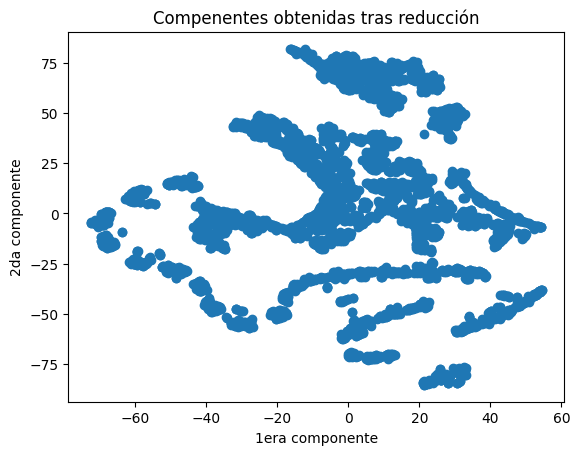

In [140]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE

# Paso 1: Obtener las características LRMFP
custom_features_transformer = FunctionTransformer(custom_features)
lrmfp_features = custom_features_transformer.transform(df_retail)

# Paso 2: Existían valores faltantes que afectaban al código, así que usamos SimpleImputer para imputar el promedio
imputer = SimpleImputer(strategy='mean')
lrmfp_imputed = imputer.fit_transform(lrmfp_features)

# Paso 3: Aplicando MinMax creado anteriormente
minmax_scaler = MinMax()
lrmfp_scaled = minmax_scaler.fit_transform(lrmfp_imputed)

# Paso 4: Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2)
transformed_data = tsne.fit_transform(lrmfp_scaled)

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('1era componente')
plt.ylabel('2da componente')
plt.title('Compenentes obtenidas tras reducción')
plt.show()


En base a lo anterior se generó una visualización de las componentes obtenidas después de aplicar la reducción de dimensionalidad t-SNE a los datos LRMFP (Length, Recency, Monetary, Frequency, Periodicity). El gráfico de dispersión muestra la representación de los datos en un plano bidimensional. Para las 2 mejores componentes o más representativas, se observa una distribución más bien circular y dispersa, aunque claramente se puede evidencia desde ya ciertos grupos definidos en base a aglomeración de muestras con las mismas caracteristicas.

### 1.3.3 Clustering

#### 1.3.3.1 Método del Codo [1 puntos]

Utilizando la clase creada para escalamiento, aplique el método del codo para visualizar cual es el número de clusters que mejor se ajustan a los datos. Realice esto utilizando el algoritmo K-means dentro de un pipeline para un $k \in [1,20]$, donde k representa el número de clusters del k-means. Para la realización de esta sección y la próxima (1.3.3.2), considere los mismos pasos utilizados para el t-sne, pero **permutando el algoritmo de reducción de dimensionalidad por k-means.**

A través del grafico obtenido, comente y justifique que valor de k escogería para realizar el k-means.

**Respuesta:**

c:\Users\jos_5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jos_5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jos_5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jos_5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

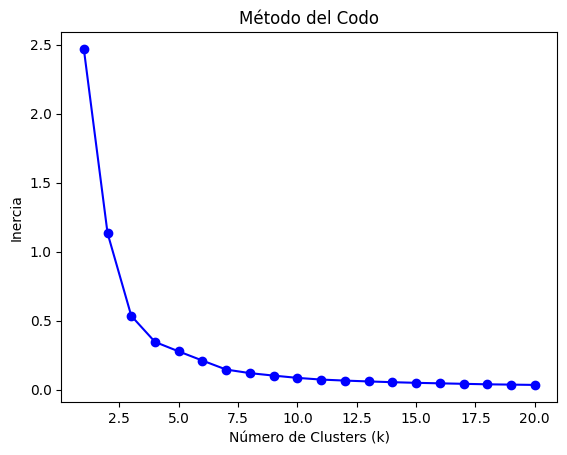

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

# Instancia del imputador
imputer = SimpleImputer(strategy='mean')

# Istancia de la clase MinMax
minmax_scaler = MinMax()

def calcular_inercia(X, k_values):
    inercia = []
    for k in k_values:
        pipeline = Pipeline([
            ('imputer', imputer),
            ('scaler', minmax_scaler),
            ('kmeans', KMeans(n_clusters=k))
        ])
        pipeline.fit(X)
        inercia.append(pipeline['kmeans'].inertia_)
    return inercia

k_values = range(1, 21)

inercia = calcular_inercia(lrmfp_imputed, k_values)

plt.plot(k_values, inercia, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


Se puede ver del gráfico que la inercia disminuye a medida que aumenta el número de clusters (k), lo cual es esperado. Por otro lado, podemos notar que la inercia disminuye rápidamente hasta k=5, donde parece haber un cambio en la tendencia. Después de k=4, la disminución en la inercia no es tan significativa. Esto sugiere que agregar más clusters no proporciona una mejora considerable en la compacidad de los clusters. Por lo que para un k mayor a 4 la mejora en la inercia es relativamente pequeña en comparación con el aumento en la complejidad del modelo.

#### 1.3.3.2 Segmentación de Clientes con K-Means 🎁 [1 punto]

En base a la elección de k realizada en la sección anterior, utilice este valor escogido y entrene un modelo de K-means utilizando el mismo pipeline de scikit-learn utilizado anteriormente.

Una vez ajustado los datos, genere una tabla con los promedios (o medianas) para cada uno de los atributos, agrupando estos por el clúster que pertenecen. ¿Es posible observar agrupaciones coherentes?, ¿Qué tipo de clientes posee el retail?, Justifique su respuesta y no decepcione a Mr. Lepin.


In [142]:
np.isnan(lrmfp_imputed).sum()

0

**Respuesta:**

In [143]:
# Ajustando el modelo de K-means con k = 4
k = 4
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', minmax_scaler),
    ('kmeans', KMeans(n_clusters=k))
])
pipeline.fit(lrmfp_features)

cluster_labels = pipeline['kmeans'].labels_

data_with_clusters = lrmfp_features.copy()
data_with_clusters['Cluster'] = cluster_labels.astype(int)

cluster_counts = data_with_clusters.groupby('Cluster').size().reset_index(name='Count')

cluster_means = data_with_clusters.groupby('Cluster').mean()

# Promedios y cantidad por clúster
cluster_summary = pd.merge(cluster_means, cluster_counts, on='Cluster')

cluster_summary


c:\Users\jos_5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,Length,Recency,Monetary,Frequency,Periodicity,Count
0,0,41.260300,53.693508,5.972635,2.121723,5.921452,1602
1,1,0.000000,263.000000,8955.835000,1.500000,0.000000,2
2,2,279.178755,35.828669,3.580479,8.153055,20.872628,1751
3,3,23.838373,250.408759,9.163798,1.602711,3.977796,959


Se puede apreciar una coherencia en los grupos encontrados ya que si bien comparten similitudes, son grupos claramente diferenciados en su frecuencia de compra, valor de compra (monetary) y cuanto llevan comprando en promedio en el retail, es más existen dos grupos mayoritarios los del cluster 0 y 2 que son los que compran con una frecuencia alta pero no desembolsando tanto dinero, estos signfican 1604 muestras dentro del dataset, por otro lado tenemos el cluster 2 que son personas que llevan mucho tiempo comprando en la tienda estos son los clientes mas leales y significan un buen número de las muestras, sin embargo son los que desembolsan menos dinero y mayor frecuencia. Por tanto en resumen los clientes se pueden agrupar en:

- Clientes frecuentes de bajo valor: Representados en el cluster 0, son aquellos que tienen una frecuencia de compra alta pero un valor monetario bajo en promedio. Son clientes que realizan compras con regularidad pero de menor cuantía.

- Clientes leales de baja frecuencia: Representados en el cluster 2, son clientes que llevan mucho tiempo comprando en el retail, pero su valor monetario promedio y frecuencia de compra son relativamente bajos. Estos clientes pueden ser considerados como clientes leales pero con un menor nivel de gasto.

- Clientes ocasionales de alto valor: Representados en el cluster 1, son aquellos que realizaron una única compra de alto valor y luego dejaron de interactuar con el retail. Estos clientes pueden requerir estrategias específicas para fomentar su retorno y realizar compras adicionales.

- Clientes esporádicos de bajo valor: Representados en el cluster 3, son clientes que realizan compras esporádicas y de bajo valor. Tienen una longitud y recency de compra moderadas, pero su nivel de gasto y frecuencia de compra son relativamente bajos.

**Respuesta Esperada:**

|         | Length  | Recency   | Frequency | Monetary | Periodicity |       |
|---------|---------|-----------|----------|-------------|-------|-------|
| Cluster |         |           |          |             |       |       |
|    0    |   258.8 |      45.2 |     76.1 |      1107.7 | 107.6 |   449 |
|    1    |    76.1 |     217.6 |     45.5 |       791.7 |  14.1 |   466 |
|    2    |   368.5 |       4.8 |   2715.0 |    226621.6 |   4.2 |     4 |
|    3    |    85.3 |      45.7 |     65.8 |      1047.0 |  10.5 |   987 |
|    4    |   347.2 |      15.9 |   1658.0 |     35829.3 |   8.0 |    25 |
|    5    |   298.0 |      29.8 |    183.8 |      3639.9 |  32.0 |  1188 |

#### 1.3.3.3 Plot de K-Means 📈 [0.5 puntos]



Por último, Mr. Lepin, impaciente de no entender lo que usted intenta explicarle, le solicita que por favor muestre algún resultado "visual" de los grupos encontrados.

Para esto, grafique nuevamente las características encontradas usando `T-SNE` (no calcule de nuevo, simplemente utilice las proyecciones encontradas) y agregue las labels calculadas con kmeans como el argumento `color`.   

Comente: ¿Se separan bien los distintos clusters en la visualización?


**Respuesta:**

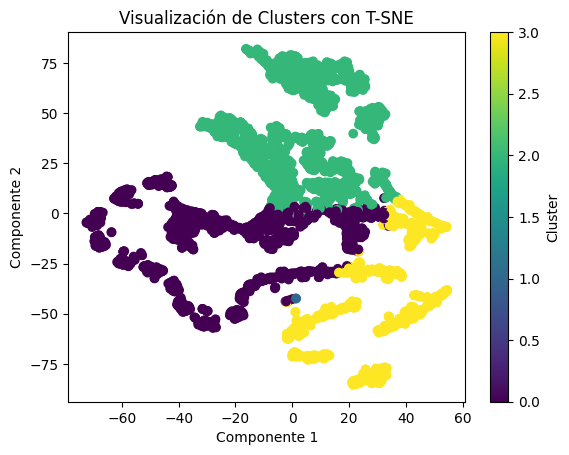

In [144]:
# Filtrando las proyecciones de T-SNE correspondientes a registros no eliminados
filtered_transformed_data = transformed_data[:len(cluster_labels)]

# Graficando clusters k means
plt.scatter(filtered_transformed_data[:, 0], filtered_transformed_data[:, 1], c=cluster_labels)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Visualización de Clusters con T-SNE')
plt.colorbar(label='Cluster')
plt.show()


La visualización del gráfico de clusters utilizando T-SNE muestra una separación relativamente clara entre los diferentes grupos. Sin embargo, se observa que algunas muestras están mal clasificadas, lo que indica cierta superposición entre los clusters. A pesar de esta superposición, la distribución general de los puntos sugiere que existen agrupaciones coherentes en los datos. Es importante tener en cuenta que la visualización puede no ser completamente representativa de las agrupaciones reales debido a la dimensionalidad de los datos y la naturaleza no supervisada del algoritmo utilizado.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por correo, Discord o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>